In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [9]:
fraud =pd.read_csv('/content/Fraud_check.csv')

In [10]:
fraud. head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [15]:
label_encoder=preprocessing.LabelEncoder()

In [17]:
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [18]:
fraud['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [31]:
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])

In [32]:
x=fraud.iloc[:,1:5]
y=fraud['Urban']

In [33]:
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,2,68833,50047,10
1,0,33700,134075,18
2,1,36925,160205,30
3,2,50190,193264,15
4,1,81002,27533,28
...,...,...,...,...
595,0,76340,39492,7
596,0,69967,55369,2
597,0,47334,154058,0
598,1,98592,180083,17


In [34]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int64

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
xtrain

,Marital.Status,Taxable.Income,City.Population,Work.Experience
118,0,29944,199174,10
362,0,16320,75552,17
55,2,19925,89965,16
90,0,77634,101232,29
390,2,64437,57324,17
...,...,...,...,...
277,0,63710,117364,11
9,0,98152,155482,4
359,2,33215,157299,11
192,1,48313,126556,10


In [37]:
ytrain

118    0
362    1
55     1
90     0
390    0
      ..
277    0
9      1
359    0
192    1
559    0
Name: Urban, Length: 480, dtype: int64

Buliding Decision Tree calssifier using Entropy criteria

[ ]


In [38]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

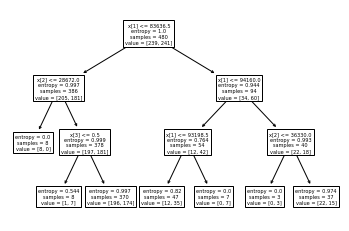

In [39]:
tree.plot_tree(model);

In [41]:
ytrain.value_counts()

1    241
0    239
Name: Urban, dtype: int64

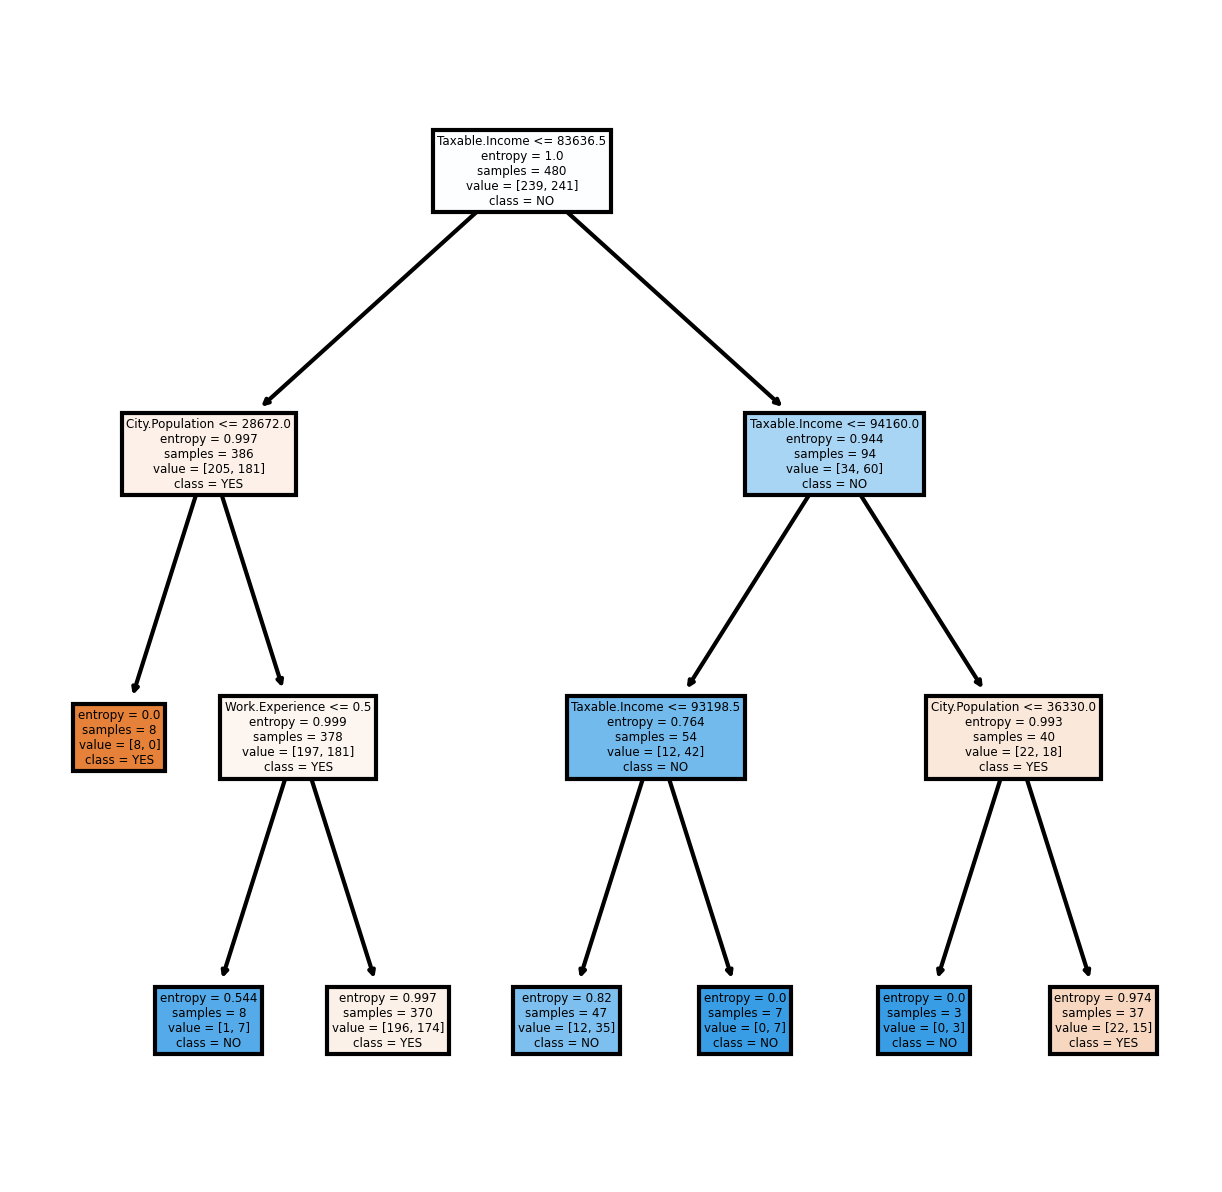

In [43]:
fn=['Marital.Status	','Taxable.Income','City.Population','Work.Experience']
cn=['YES','NO']
fig,axes =plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);